# Course 1: Classification and Vector Spaces
# Assignment 3: Hello Vectors

Welcome to this week's programming assignment on exploring word vectors. In natural language processing, we represent each word as a vector consisting of numbers. The vector encodes the meaning of the word. These numbers (or weights) for each word are learned using various machine learning models, which we will explore in more detail later in this specialization. Rather than make you code the machine learning models from scratch, we will show you how to use them. In the real world, you can always load the trained word vectors, and you will almost never have to train them from scratch. In this assignment, you will:

Predict analogies between words.
Use PCA to reduce the dimensionality of the word embeddings and plot them in two dimensions.
Compare word embeddings by using a similarity measure (the cosine similarity).
Understand how these vector space models work.

- Predict analogies between words.
- Use PCA to reduce the dimensionality of the word embeddings and plot them in two dimensions.
- Compare word embeddings by using a similarity measure (the cosine similarity).
Understand how these vector space models work.

## 1.0 Predict the Countries from Capitals
In the lectures, we have illustrated the word analogies by finding the capital of a country from the country. We have changed the problem a bit in this part of the assignment. You are asked to predict the countries that corresponds to some capitals. You are playing trivia against some second grader who just took their geography test and knows all the capitals by heart. Thanks to NLP, you will be able to answer the questions properly. In other words, you will write a program that can give you the country by its capital. That way you are pretty sure you will win the trivia game. We will start by exploring the data set.

### 1.1. Load the Data
As usual, you start by importing some essential Python libraries and then load the dataset. The dataset will be loaded as a Pandas DataFrame, which is very a common method in data science. This may take a few minutes because of the large size of the data.

In [35]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def get_vectors(embeddings, words):
    """
    Input:
        embeddings: a word 
        fr_embeddings:
        words: a list of words
    Output: 
        X: a matrix where the rows are the embeddings corresponding to the rows on the list
        
    """
    m = len(words)
    X = np.zeros((1, 300))
    for word in words:
        english = word
        eng_emb = embeddings[english]
        X = np.row_stack((X, eng_emb))
    X = X[1:,:]
    return X

In [3]:
# Capitals.txt. Separated by spaces. Columns city1, country1, city2, country2
data = pd.read_csv('capitals.txt', sep=' ', header=None)
data.columns = ['city1', 'country1', 'city2', 'country2']

data.head()

,city1,country1,city2,country2
0,Athens,Greece,Baghdad,Iraq
1,Athens,Greece,Bangkok,Thailand
2,Athens,Greece,Beijing,China
3,Athens,Greece,Berlin,Germany
4,Athens,Greece,Bern,Switzerland


In [5]:
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb"))
print(len(word_embeddings))  # there should be 243 words that will be used
print("dimension: {}".format(word_embeddings['Spain'].shape[0]))

243
dimension: 300


## Predict relationships among words
Now you will write a function that will use the word embeddings to predict relationships among words.

The function will take as input three words.
The first two are related to each other.
It will predict a 4th word which is related to the third word in a similar manner as the two first words are related to each other.
As an example, "Athens is to Greece as Bangkok is to __"?
You will write a program that is capable of finding the fourth word.
We will give you a hint to show you how to compute this.

### 1.2 Cosine Similarity

 A and B represent the word vectors and Ai and Bi represent index i of that vector. & Note that if A and B are identical, you will get .

Otherwise, if they are the total opposite, meaning, , then you would get .
If you get , that means that they are orthogonal (or perpendicular).
Numbers between 0 and 1 indicate a similarity score.
Numbers between -1-0 indicate a dissimilarity score.

In [6]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def cosine_similarity(A, B):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        cos: numerical number representing the cosine similarity between A and B.
    '''

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    dot = np.dot(A, B)
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
    cos = dot / (norma * normb)

    ### END CODE HERE ###
    return cos

In [11]:
print(word_embeddings.keys())

dict_keys(['country', 'city', 'China', 'Iraq', 'oil', 'town', 'Canada', 'London', 'England', 'Australia', 'Japan', 'Pakistan', 'Iran', 'gas', 'happy', 'Russia', 'Afghanistan', 'France', 'Germany', 'Georgia', 'Baghdad', 'village', 'Spain', 'Italy', 'Beijing', 'Jordan', 'Paris', 'Ireland', 'Turkey', 'Egypt', 'Lebanon', 'Taiwan', 'Tokyo', 'Nigeria', 'Vietnam', 'Moscow', 'Greece', 'Indonesia', 'sad', 'Syria', 'Thailand', 'Libya', 'Zimbabwe', 'Cuba', 'Ottawa', 'Tehran', 'Sudan', 'Kenya', 'Philippines', 'Sweden', 'Poland', 'Ukraine', 'Rome', 'Venezuela', 'Switzerland', 'Berlin', 'Bangladesh', 'Portugal', 'Ghana', 'Athens', 'king', 'Madrid', 'Somalia', 'Dublin', 'Qatar', 'Chile', 'Islamabad', 'Bahrain', 'Nepal', 'Norway', 'Serbia', 'Kabul', 'continent', 'Brussels', 'Belgium', 'Uganda', 'petroleum', 'Cairo', 'Denmark', 'Austria', 'Jamaica', 'Georgetown', 'Bangkok', 'Finland', 'Peru', 'Romania', 'Bulgaria', 'Hungary', 'Vienna', 'Kingston', 'Manila', 'Cyprus', 'Azerbaijan', 'Copenhagen', 'Fiji',

In [12]:
# feel free to try different words
king = word_embeddings['king']
queen = word_embeddings['queen']

print(cosine_similarity(king, queen))

# Print for "country" and "city"
country = word_embeddings['country']
city = word_embeddings['city']
print(cosine_similarity(country, city))

0.6510957
0.3229881


### 1.3 Euclidean distance
You will now implement a function that computes the similarity between two vectors using the Euclidean distance. Euclidean distance is defined as:

- n is the number of elements in the vector
- A and B are the corresponding word vectors.
The more similar the words, the more likely the Euclidean distance will be close to 0.

In [17]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def euclidean(A, B):
    """
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        d: numerical number representing the Euclidean distance between A and B.
    """

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

    # euclidean distance

    diff = A - B
    delta = np.square(diff)
    d = np.sqrt(np.sum(delta))

    ### END CODE HERE ###

    return d

In [18]:
# Test your function
euclidean(king, queen)

2.4796925

### 1.4 Finding the country of each capital

Now, you will use the previous functions to compute similarities between vectors, and use these to find the capital cities of countries. You will write a function that takes in three words, and the embeddings dictionary. Your task is to find the capital cities. For example, given the following words:

1: Athens 2: Greece 3: Baghdad,
your task is to predict the country 4: Iraq.

**Instructions**:

1. To predict the capital you might want to look at the King - Man + Woman = Queen example above, and implement that scheme into a mathematical function, using the word embeddings and a similarity function.

2. Iterate over the embeddings dictionary and compute the cosine similarity score between your vector and the current word embedding.

3. You should add a check to make sure that the word you return is not any of the words that you fed into your function. Return the one with the highest score.

In [31]:
def get_country(city1, country1, city2, embeddings):
    """
    Input:
        city1: a string (the capital city of country1)
        country1: a string (the country of capital1)
        city2: a string (the capital city of country2)
        embeddings: a dictionary where the keys are words and values are their embeddings
    Output:
        countries: a dictionary with the most likely country and its similarity score
    """
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

    # store the city1, country 1, and city 2 in a set called group
    group = set((city1, country1, city2))

    # get embeddings of city 1
    city1_emb = word_embeddings[city1]

    # get embedding of country 1
    country1_emb = word_embeddings[country1]

    # get embedding of city 2
    city2_emb = word_embeddings[city2]

    # get embedding of country 2 (it's a combination of the embeddings of country 1, city 1 and city 2)
    # Remember: King - Man + Woman = Queen
    vec = country1_emb - city1_emb + city2_emb

    # Initialize the similarity to -1 (it will be replaced by a similarities that are closer to +1)
    similarity = -1

    # initialize country to an empty string
    country = ''

    # loop through all words in the embeddings dictionary
    for word in embeddings.keys():

        # first check that the word is not already in the 'group'
        if word not in group:

            # get the word embedding
            word_emb = word_embeddings[word]

            # calculate cosine similarity between embedding of country 2 and the word in the embeddings dictionary
            cur_similarity = cosine_similarity(vec, word_emb)

            # if the cosine similarity is more similar than the previously best similarity...
            if cur_similarity > similarity:

                # update the similarity to the new, better similarity
                similarity = cur_similarity

                # store the country as a tuple, which contains the word and the similarity
                country = (word, similarity)

    ### END CODE HERE ###

    return country

In [32]:
# Testing your function, note to make it more robust you can return the 5 most similar words.
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626821)

### 1.5 Model Accuracy


In [38]:
def get_accuracy(word_embeddings, data):
    '''
    Input:
        word_embeddings: a dictionary where the key is a word and the value is its embedding
        data: a pandas dataframe containing all the country and capital city pairs
    
    Output:
        accuracy: the accuracy of the model
    '''

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # initialize num correct to zero
    num_correct = 0

    # loop through the rows of the dataframe
    for i, row in tqdm(data.iterrows(), total=len(data)):

        # get city1
        city1 = row['city1']

        # get country1
        country1 = row['country1']

        # get city2
        city2 =  row['city2']

        # get country2
        country2 = row['country2']

        # use get_country to find the predicted country2
        predicted_country2, _ = get_country(city1, country1, city2, word_embeddings)

        # if the predicted country2 is the same as the actual country2...
        if predicted_country2 == country2:
            # increment the number of correct by 1
            num_correct += 1

    # get the number of rows in the data dataframe (length of dataframe)
    m = len(data)

    # calculate the accuracy by dividing the number correct by m
    accuracy = num_correct / m

    ### END CODE HERE ###
    return accuracy

In [39]:
accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

100%|██████████| 4952/4952 [00:33<00:00, 148.73it/s]

Accuracy is 0.92


## Plotting the vectors using PCA

Now you will explore the distance between word vectors after reducing their dimension. The technique we will employ is known as principal component analysis (PCA). As we saw, we are working in a 300-dimensional space in this case. Although from a computational perspective we were able to perform a good job, it is impossible to visualize results in such high dimensional spaces.

You can think of PCA as a method that projects our vectors in a space of reduced dimension, while keeping the maximum information about the original vectors in their reduced counterparts. In this case, by maximum infomation we mean that the Euclidean distance between the original vectors and their projected siblings is minimal. Hence vectors that were originally close in the embeddings dictionary, will produce lower dimensional vectors that are still close to each other.

You will see that when you map out the words, similar words will be clustered next to each other. For example, the words 'sad', 'happy', 'joyful' all describe emotion and are supposed to be near each other when plotted. The words: 'oil', 'gas', and 'petroleum' all describe natural resources. Words like 'city', 'village', 'town' could be seen as synonyms and describe a similar thing.

Before plotting the words, you need to first be able to reduce each word vector with PCA into 2 dimensions and then plot it. The steps to compute PCA are as follows:

1. Mean normalize the data
2. Compute the covariance matrix of your data ().
3. Compute the eigenvectors and the eigenvalues of your covariance matrix
4. Multiply the first K eigenvectors by your normalized data. The transformation should look something as follows:

**Instructions**:

- The word vectors are of dimension 300.
- Use PCA to change the 300 dimensions to n_components dimensions.
- The new matrix should be of dimension m, n_componentns.
- First de-mean the data
- Get the eigenvalues using linalg.eigh. Use eigh rather than eig since R is symmetric. The performance gain when using eigh instead of eig is substantial.
- Sort the eigenvectors and eigenvalues by decreasing order of the eigenvalues.
- Get a subset of the eigenvectors (choose how many principle components you want to use using n_components).
- Return the new transformation of the data by multiplying the eigenvectors with the original data.

In [51]:
def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    """

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # mean center the data
    X_demeaned = X - X.mean(axis=0)

    # calculate the covariance matrix
    covariance_matrix = np.cov(X_demeaned, rowvar=False)

    # calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')

    # sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    
    # reverse the order so that it's from highest to lowest.
    idx_sorted_decreasing = idx_sorted[::-1]

    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:, idx_sorted_decreasing]

    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    eigen_vecs_subset = eigen_vecs_sorted[:, :n_components]

    # transform the data by multiplying the transpose of the eigenvectors 
    # with the transpose of the de-meaned data
    # Then take the transpose of that product.
    X_reduced = np.dot(eigen_vecs_subset.T, X_demeaned.T).T

    ### END CODE HERE ###

    return X_reduced

In [52]:
# Testing your function
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

Your original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]


Now you will use your pca function to plot a few words we have chosen for you. You will see that similar words tend to be clustered near each other. Sometimes, even antonyms tend to be clustered near each other. Antonyms describe the same thing but just tend to be on the other end of the scale They are usually found in the same location of a sentence, have the same parts of speech, and thus when learning the word vectors, you end up getting similar weights. In the next week we will go over how you learn them, but for now let's just enjoy using them.

In [53]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


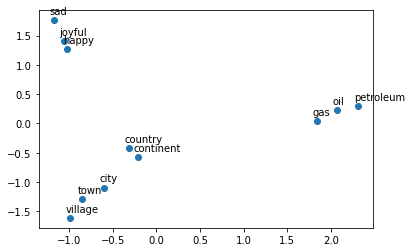

In [56]:
# We have done the plotting for you. Just run this cell.
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()